# Brief Machine Learning Tutorial

Welcome to this concise machine learning tutorial! We'll cover the essential concepts and build a simple ML model in just a few steps.

## What We'll Cover:
- Import libraries and load data
- Explore the dataset
- Prepare data for training
- Train multiple ML models
- Evaluate and compare results

## 1. Import Libraries and Load Data

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the famous Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal/petal length and width
y = iris.target  # Target: flower species (0=setosa, 1=versicolor, 2=virginica)

print("Dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

Dataset loaded successfully!
Features shape: (150, 4)
Target shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


## 2. Explore the Dataset

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000    

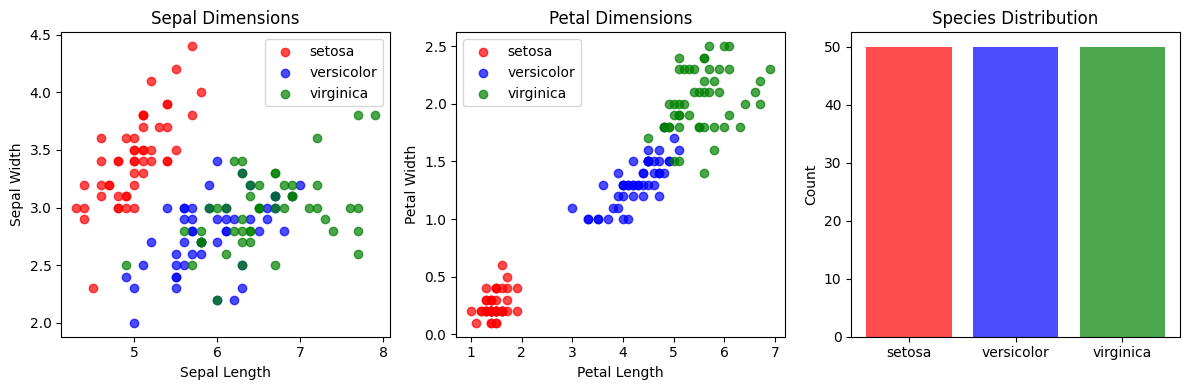


Key insights:
• Dataset has 150 samples of 3 iris species
• Each species has exactly 50 samples (balanced dataset)
• Petal dimensions seem to separate species better than sepal dimensions


In [4]:
# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("First 5 rows:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

# Simple visualization
plt.figure(figsize=(12, 4))

# Scatter plot: Sepal length vs width
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=species, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions')
plt.legend()

# Scatter plot: Petal length vs width
plt.subplot(1, 3, 2)
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 2], X[mask, 3], c=colors[i], label=species, alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Dimensions')
plt.legend()

# Species count
plt.subplot(1, 3, 3)
species_counts = df['species'].value_counts()
plt.bar(species_counts.index, species_counts.values, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Species Distribution')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"\nKey insights:")
print(f"• Dataset has {len(df)} samples of 3 iris species")
print(f"• Each species has exactly 50 samples (balanced dataset)")
print(f"• Petal dimensions seem to separate species better than sepal dimensions")

## 3. Prepare Data for Training

We'll split our data into training and testing sets. The training set is used to teach the model, while the testing set evaluates how well it performs on unseen data.

In [5]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# Check class distribution in training set
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nTraining set class distribution:")
for i, count in enumerate(counts):
    print(f"  {iris.target_names[i]}: {count} samples")

Data split completed!
Training set: 120 samples
Testing set: 30 samples
Features: 4

Training set class distribution:
  setosa: 40 samples
  versicolor: 40 samples
  virginica: 40 samples


## 4. Train Machine Learning Models

We'll train three different types of ML algorithms and compare their performance:
- **Logistic Regression**: Linear model for classification
- **Decision Tree**: Rule-based model that asks yes/no questions
- **Random Forest**: Combines multiple decision trees for better accuracy

In [6]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train models and store results
results = {}

print("Training models...")
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"{name}: {accuracy:.3f} accuracy")

print("\nTraining completed!")

Training models...
Logistic Regression: 0.967 accuracy
Decision Tree: 0.933 accuracy
Random Forest: 0.900 accuracy

Training completed!


## 5. Evaluate and Compare Results

Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.966667
1        Decision Tree  0.933333
2        Random Forest  0.900000


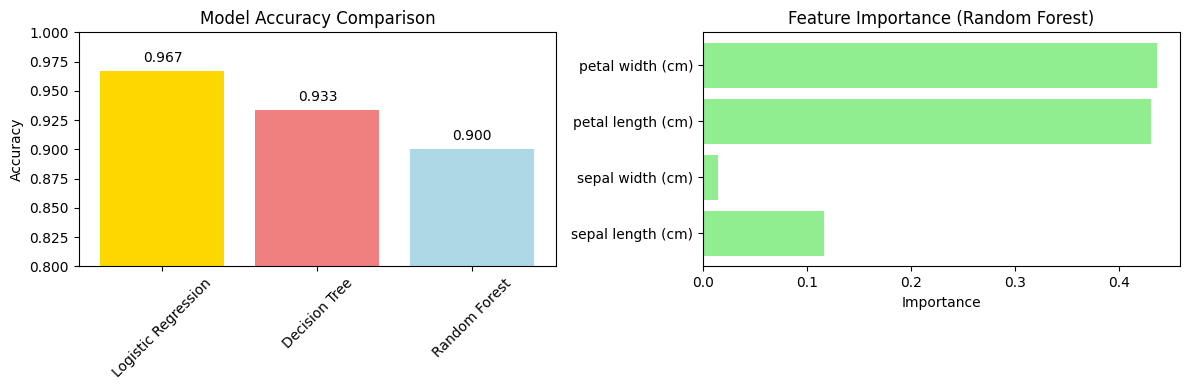


🏆 Best Model: Logistic Regression
   Accuracy: 0.967 (96.7%)

Detailed Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("Model Performance Comparison:")
print(comparison_df)

# Visualize results
plt.figure(figsize=(12, 4))

# Accuracy comparison
plt.subplot(1, 2, 1)
colors = ['gold', 'lightcoral', 'lightblue']
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

# Add accuracy values on bars
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)

# Feature importance (using Random Forest)
plt.subplot(1, 2, 2)
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
plt.barh(iris.feature_names, feature_importance, color='lightgreen')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Best model
best_model = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n🏆 Best Model: {best_model}")
print(f"   Accuracy: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")

# Detailed classification report for best model
print(f"\nDetailed Classification Report ({best_model}):")
best_predictions = results[best_model]['predictions']
print(classification_report(y_test, best_predictions, target_names=iris.target_names))

## 6. Make Predictions on New Data

Let's test our best model by predicting the species of some new iris flowers!

Predictions for new flowers:

1. Small flower (sepal: 5.1×3.5, petal: 1.4×0.2)
   Predicted species: setosa
   Confidence: 97.8%
   Probabilities:
     setosa: 97.8%
     versicolor: 2.2%
     virginica: 0.0%

2. Medium flower (sepal: 6.2×2.8, petal: 4.8×1.8)
   Predicted species: virginica
   Confidence: 54.0%
   Probabilities:
     setosa: 0.1%
     versicolor: 45.9%
     virginica: 54.0%

3. Large flower (sepal: 7.7×3.8, petal: 6.7×2.2)
   Predicted species: virginica
   Confidence: 99.5%
   Probabilities:
     setosa: 0.0%
     versicolor: 0.5%
     virginica: 99.5%


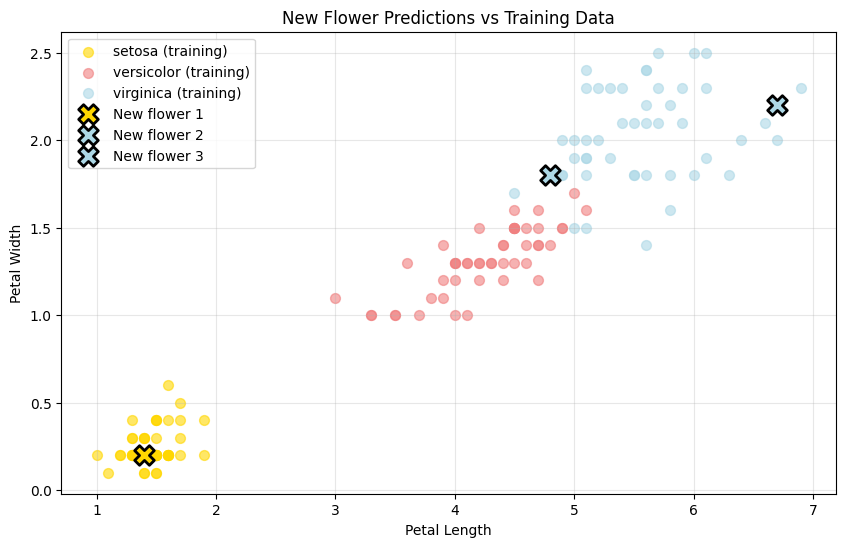


🎯 Summary:
Successfully classified 3 new flowers using Logistic Regression!
The model uses petal and sepal measurements to predict iris species.


In [8]:
# Create some new flower measurements to predict
new_flowers = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Small petals - likely Setosa
    [6.2, 2.8, 4.8, 1.8],  # Medium size - likely Versicolor
    [7.7, 3.8, 6.7, 2.2]   # Large petals - likely Virginica
])

flower_descriptions = [
    "Small flower (sepal: 5.1×3.5, petal: 1.4×0.2)",
    "Medium flower (sepal: 6.2×2.8, petal: 4.8×1.8)", 
    "Large flower (sepal: 7.7×3.8, petal: 6.7×2.2)"
]

# Use our best model to make predictions
best_model_obj = results[best_model]['model']
predictions = best_model_obj.predict(new_flowers)
prediction_probabilities = best_model_obj.predict_proba(new_flowers)

print("Predictions for new flowers:")
print("=" * 50)

for i, (desc, pred, probs) in enumerate(zip(flower_descriptions, predictions, prediction_probabilities)):
    predicted_species = iris.target_names[pred]
    confidence = max(probs) * 100
    
    print(f"\n{i+1}. {desc}")
    print(f"   Predicted species: {predicted_species}")
    print(f"   Confidence: {confidence:.1f}%")
    
    # Show probabilities for all species
    print("   Probabilities:")
    for j, species in enumerate(iris.target_names):
        print(f"     {species}: {probs[j]*100:.1f}%")

# Visualize the predictions
plt.figure(figsize=(10, 6))

# Plot existing data
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 2], X[mask, 3], c=colors[i], label=f'{species} (training)', alpha=0.6, s=50)

# Plot new predictions
for i, (pred, flower) in enumerate(zip(predictions, new_flowers)):
    plt.scatter(flower[2], flower[3], c=colors[pred], marker='X', s=200, 
               edgecolors='black', linewidth=2, label=f'New flower {i+1}')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('New Flower Predictions vs Training Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎯 Summary:")
print(f"Successfully classified {len(new_flowers)} new flowers using {best_model}!")
print(f"The model uses petal and sepal measurements to predict iris species.")

## 🎉 Congratulations!

You've completed a brief machine learning tutorial! Here's what you learned:

### Key Concepts Covered:
1. **Data Loading**: Using scikit-learn's built-in datasets
2. **Data Exploration**: Understanding your data through statistics and visualization
3. **Data Splitting**: Separating data into training and testing sets
4. **Model Training**: Training multiple ML algorithms
5. **Model Evaluation**: Comparing performance using accuracy metrics
6. **Predictions**: Using trained models on new data

### ML Algorithms Used:
- **Logistic Regression**: Simple linear classifier
- **Decision Tree**: Rule-based classifier
- **Random Forest**: Ensemble method combining multiple trees

### Next Steps:
- Try different datasets (regression problems, larger datasets)
- Explore data preprocessing (scaling, encoding categorical variables)
- Learn about cross-validation and hyperparameter tuning
- Study more advanced algorithms (SVM, Neural Networks, XGBoost)

### Remember:
- Machine learning is about finding patterns in data
- Always split your data to properly evaluate models
- Different algorithms work better for different problems
- Feature engineering and data quality are crucial for success

Happy machine learning! 🚀